In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
mobile = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
mobile.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
mobile["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [5]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<function matplotlib.pyplot.show(close=None, block=None)>

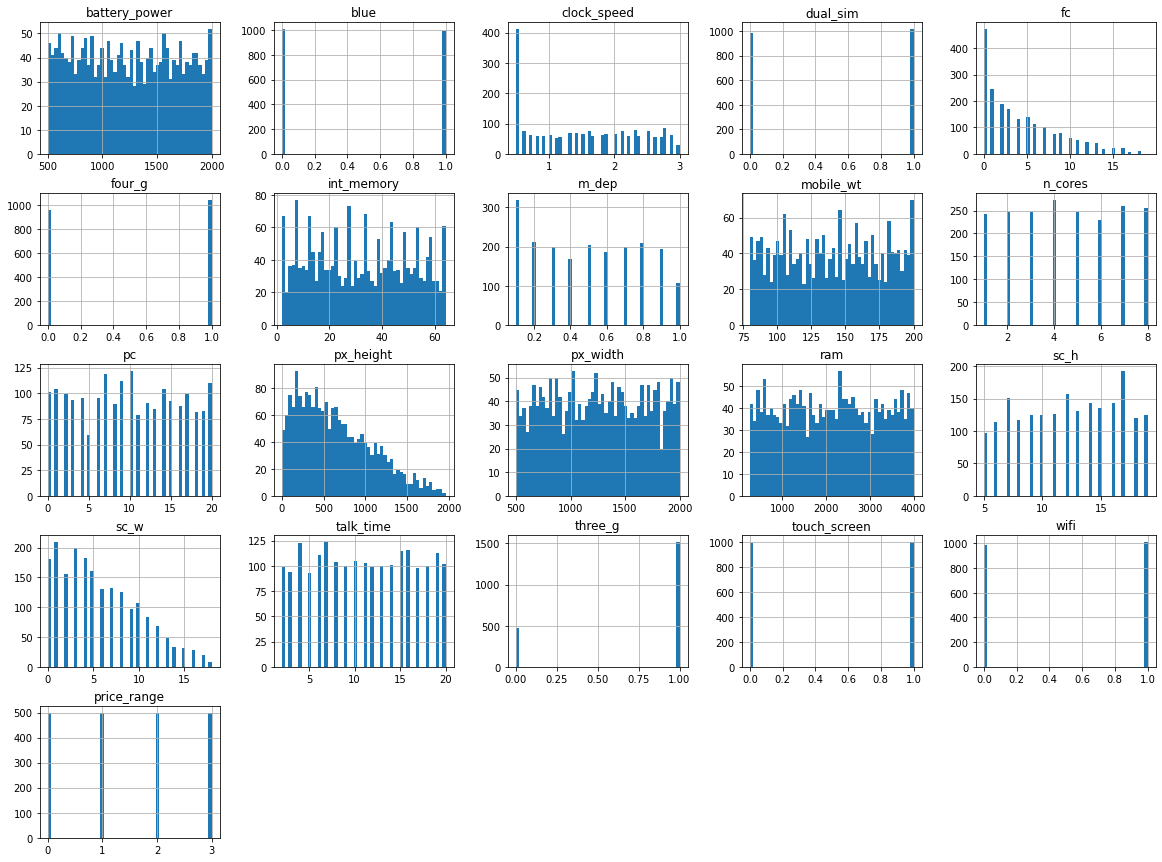

In [6]:
import matplotlib.pyplot as plt
mobile.hist(bins=50, figsize=(20,15))
plt.show

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(mobile, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

1600
400


In [8]:
corr_matrix = mobile.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='battery_power', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_height', ylabel='price_range'>,
        <AxesSubplot:xlabel='touch_screen', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>,
        <AxesSubplot:xlabel='touch_screen', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>,
        <Ax

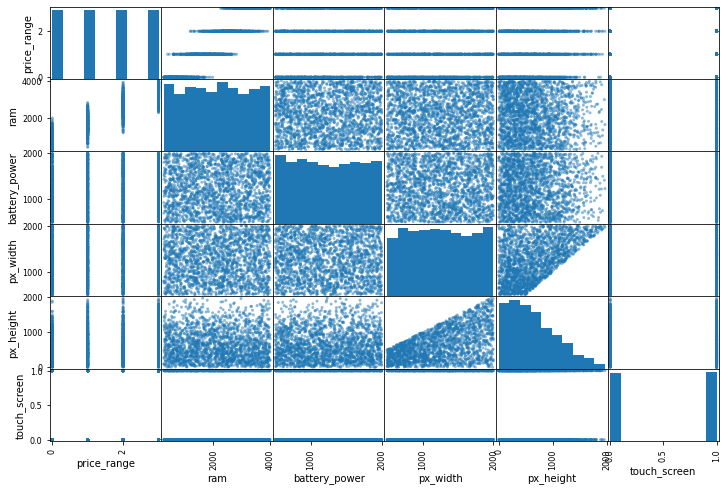

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["price_range", "ram", "battery_power", "px_width", "px_height", "touch_screen"]
scatter_matrix(mobile[attributes], figsize=(12,8))

In [10]:
mobile["px_res"] = mobile["px_width"] * mobile["px_height"]

In [11]:
corr_matrix = mobile.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_res           0.176240
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [12]:
mobile = train_set.drop("price_range", axis=1)
mobile_labels = train_set["price_range"].copy()

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(mobile,mobile_labels)

DecisionTreeRegressor()

In [14]:
from sklearn.metrics import mean_squared_error

mobile_predictions = tree_reg.predict(mobile)
tree_mse = mean_squared_error(mobile_labels, mobile_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, mobile, mobile_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [16]:
print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())

Scores: [0.4472136  0.40311289 0.41079192 0.34460122 0.4330127  0.31622777
 0.34460122 0.45414755 0.35355339 0.46097722]
Mean: 0.39682394731298704


In [17]:
mobile_test = train_set.drop("price_range", axis=1)
mobile_test_labels = train_set["price_range"].copy()

mobile_test_predictions = tree_reg.predict(mobile_test)

In [18]:
print("Predictions: \t",list(int(i) for i in mobile_test_predictions[70:90]))
print("Actual: \t",list(mobile_test_labels[70:90]))

Predictions: 	 [0, 2, 1, 0, 1, 2, 3, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 3, 1, 2]
Actual: 	 [0, 2, 1, 0, 1, 2, 3, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 3, 1, 2]


In [19]:
test_scores = cross_val_score(tree_reg, mobile_test, mobile_test_labels, scoring="neg_mean_squared_error", cv=10)
test_tree_rmse_scores = np.sqrt(-test_scores)

In [20]:
print("Test Scores:", test_tree_rmse_scores)
print("Test Mean:", test_tree_rmse_scores.mean())

Test Scores: [0.47434165 0.42573466 0.39528471 0.34460122 0.4330127  0.34460122
 0.3354102  0.44017042 0.35355339 0.4472136 ]
Test Mean: 0.39939237594508703
